<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/Reto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gestión de riesgos operacionales - FINTECH

En este espacio de trabajo se plantea como **caso de estudio** el análisis del **riesgo operacional asociado a las operaciones de una empresa FINTECH**.

Esta FINTECH ofrece servicios financieros digitales y realiza un alto volumen de **transacciones electrónicas** para sus clientes. Debido a la dependencia de sus plataformas tecnológicas, la empresa está expuesta a **fallos tecnológicos** que pueden generar pérdidas económicas relevantes.

Los **riesgos operacionales** analizados están relacionados con interrupciones, errores o fallas en los sistemas tecnológicos que soportan las transacciones. Dicho riesgo operacional se describe a través de **dos variables aleatorias fundamentales**:

* **Frecuencia**: indica el número de eventos de fallos tecnológicos que ocurren en un periodo de tiempo determinado.
* **Severidad**: indica el monto de la pérdida económica asociada a cada evento de fallo tecnológico.

El **producto entre la frecuencia y la severidad** da como resultado la **Distribución Agregada de Pérdidas (LDA – Loss Distribution Approach)**, la cual permite estimar las pérdidas totales asociadas al riesgo operacional.

La caracterización de esta distribución agregada se realiza mediante **medidas de tendencia central y dispersión**, tales como la **media, varianza, coeficiente de asimetría y curtosis**, permitiendo identificar pérdidas esperadas, no esperadas y escenarios de pérdidas catastróficas.

Para la estimación de la distribución LDA, la FINTECH utiliza un **muestreo de las variables de frecuencia y severidad con una confiabilidad del 99,9%**, aplicando el **método de Montecarlo** como herramienta principal de simulación.

Finalmente, los datos utilizados para el análisis provienen del archivo **Fallos Tecnológicos.xlsx**, el cual sirve como base para la integración, simulación y análisis estadístico del riesgo operacional.


0. Cargar las librerías de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # Esta es una librería para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

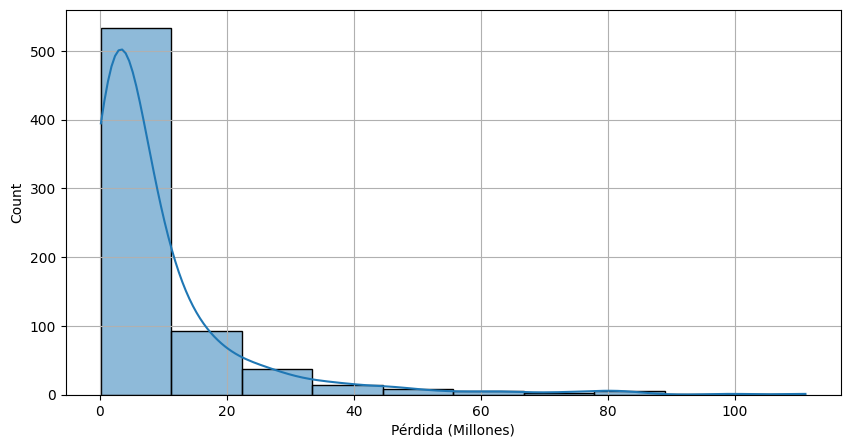

In [15]:
nxl="/content/drive/MyDrive/integración de datos y prospectiva/Reto 1/1. FallasTecnológicas.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

# Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[1:,3].astype(float)
Sev=XDB.iloc[1:,4].astype(float)
LDA=Freq*Sev

# Se procede con la construcción de la distribución agregada
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel("Pérdida (Millones)")
plt.grid()
plt.show()

2. Caracterización de la Distribución Agregada de Pérdidas (LDA)

Vamos a calcular las principales medidas estadísticas para la distribución LDA, que incluyen la media, la varianza, la desviación, el coeficiente de asimetría (skewness) y la curtosis. Estas métricas nos permitirán comprender mejor la forma, el centro y la dispersión de las pérdidas agregadas.

In [5]:
from scipy.stats import skew, kurtosis

u=np.mean(LDA)
var=np.var(LDA)
sigma=np.std(LDA)
lda_skew = skew(LDA)
lda_kurtosis = kurtosis(LDA)

T=np.column_stack((u,var,sigma,lda_skew,lda_kurtosis))
df=pd.DataFrame(T,columns=["Media","Varianza","Desviación","Asimetría","Kurtosis"])
df.head(1)

,Media,Varianza,Desviación,Asimetría,Kurtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


Considerando la definición propuesta de pérdida esperada, pérdida no esperada  y pérdida catastrófica, se procede a realizar los cálculos correspondientes.

In [7]:
# Calcular Pérdida Esperada
expected_loss = LDA.mean()

# Calcular Pérdida Catastrófica (VaR 99.9%)
catastrophic_loss = LDA.quantile(0.999)

# Calcular Pérdida No Esperada
unexpected_loss = catastrophic_loss - expected_loss

T2=np.column_stack((expected_loss,catastrophic_loss,unexpected_loss))
df2=pd.DataFrame(T2,columns=["Pérdida esperada","Pérdida catastrófica","Pérdida no esperada"])
df2.head(1)

,Pérdida esperada,Pérdida catastrófica,Pérdida no esperada
0,9.451113,102.9021,93.450987


3. Muestreo de frecuencia y severidad mediante método Monte Carlo.

La simulación de Monte Carlo es una herramienta computacional poderosa utilizada para modelar sistemas complejos y **analizar la incertidumbre** en situaciones donde las variables de entrada son aleatorias. En el contexto de la estimación del riesgo operacional, su propósito principal es **simular miles o millones de escenarios posibles** de pérdidas operacionales para construir una distribución de pérdidas agregadas (LDA).

### Metodología en Riesgo Operacional:

1.  **Modelado de la Frecuencia:** Se generan números aleatorios que simulan la cantidad de eventos de fallo tecnológico en un período, basándose en una distribución de probabilidad que mejor se ajuste a los datos históricos de frecuencia (ej. Poisson).
2.  **Modelado de la Severidad:** Para cada evento de fallo generado, se simula el monto de la pérdida económica individual, utilizando una distribución de probabilidad que describa la severidad de las pérdidas (ej. Log-Normal, Gamma).
3.  **Cálculo de la Pérdida Agregada:** Para cada escenario simulado, se multiplican la frecuencia simulada por la severidad simulada para obtener una pérdida total para ese escenario. Si hay múltiples eventos de frecuencia, se suman las severidades individuales.
4.  **Repetición y Construcción de la LDA:** Este proceso se repite un gran número de veces (ej. 10,000, 100,000 o más), generando una amplia gama de posibles resultados de pérdida. El conjunto de todas estas pérdidas agregadas simuladas forma la **Distribución Agregada de Pérdidas (LDA)**.

### Beneficios en la Estimación del Riesgo Operacional:

*   **Cuantificación de la Incertidumbre:** Permite entender la variabilidad y el rango de posibles pérdidas, no solo un valor promedio.
*   **Estimación de Pérdidas Extremas:** Es particularmente útil para estimar percentiles altos de la distribución (como el VaR al 99.9%), que corresponden a pérdidas catastróficas, algo difícil de predecir con métodos analíticos directos.
*   **Flexibilidad:** Permite la combinación de diferentes distribuciones de frecuencia y severidad, y la incorporación de correlaciones entre diferentes tipos de riesgo si fuera necesario.

El primer paso es definir el número de iteraciones para la simulación Monte Carlo, en este caso, se harán 100.000 simulaciones



In [11]:
num_simulations = 100000
print(f"Número de simulaciones Monte Carlo: {num_simulations}")

Número de simulaciones Monte Carlo: 100000


Se realizará un muestreo con reemplazo de 'Frecuencia' y 'Severidad' de las series `Freq` y `Sev` existentes, respectivamente, y luego calcularé la distribución de pérdida agregada simulada (LDA) multiplicando estos valores muestreados.


In [12]:
simulated_freq = np.random.choice(Freq, size=num_simulations, replace=True)
simulated_sev = np.random.choice(Sev, size=num_simulations, replace=True)
simulated_lda = simulated_freq * simulated_sev

print(f"Shape de frecuencia simulada: {simulated_freq.shape}")
print(f"Shape de severidad simulada: {simulated_sev.shape}")
print(f"Shape de lda simulada: {simulated_lda.shape}")
print(f"Primeros 5 valores de la lda simulada: {simulated_lda[:5]}")

Shape de frecuencia simulada: (100000,)
Shape de severidad simulada: (100000,)
Shape de lda simulada: (100000,)
Primeros 5 valores de la lda simulada: [ 1.0402 11.256  17.8008  8.4735  2.4771]


Calcularé las medidas estadísticas necesarias (media, desviación estándar, asimetría, curtosis y percentil 99,9) para la matriz `simulated_lda`, crearé un DataFrame para mostrarlas y luego generaré un histograma para visualizar la distribución.

Estadísticas de la Distribución Agregada de Pérdidas (LDA) - Simulación Monte Carlo:
      Media  Desviación Estándar  Asimetría   Kurtosis  \
0  9.259445            13.519857   4.034903  25.170357   

   Pérdida Catastrófica (99.9%)  
0                      121.1903  


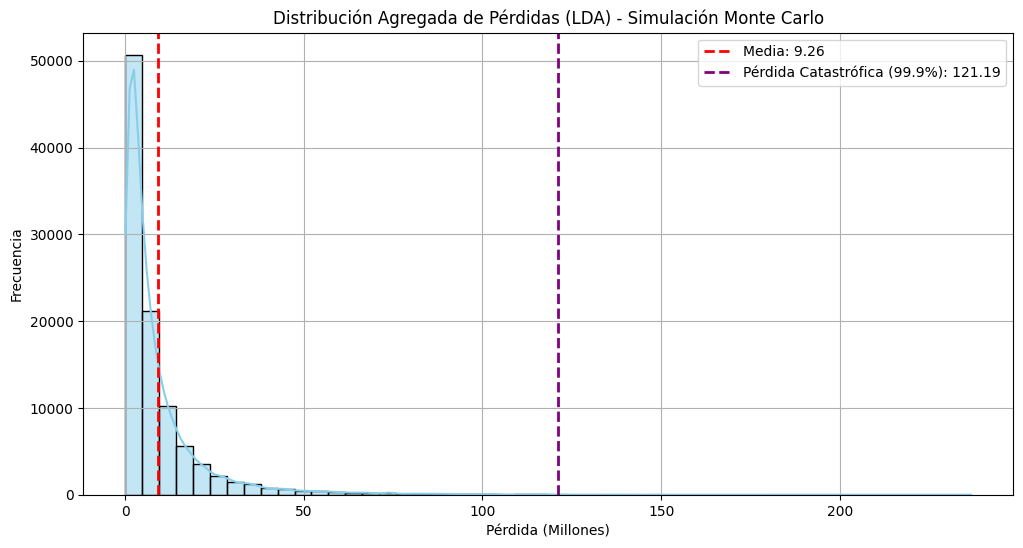

In [13]:
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la media de la distribución simulated_lda
montecarlo_mean = np.mean(simulated_lda)

# 2. Calcular la desviación estándar de la distribución simulated_lda
montecarlo_std = np.std(simulated_lda)

# 3. Calcular el coeficiente de asimetría (skewness) de la distribución simulated_lda
montecarlo_skew = skew(simulated_lda)

# 4. Calcular la curtosis de la distribución simulated_lda
montecarlo_kurtosis = kurtosis(simulated_lda)

# 5. Calcular la pérdida catastrófica como el percentil 99.9 de la distribución simulated_lda
montecarlo_catastrophic_loss = np.percentile(simulated_lda, 99.9)

# 6. Crear un DataFrame de pandas para mostrar estas estadísticas calculadas
T_montecarlo = np.column_stack((
    montecarlo_mean, montecarlo_std, montecarlo_skew, montecarlo_kurtosis, montecarlo_catastrophic_loss
))
df_montecarlo_stats = pd.DataFrame(T_montecarlo, columns=[
    "Media", "Desviación Estándar", "Asimetría", "Kurtosis", "Pérdida Catastrófica (99.9%)"
])

print("Estadísticas de la Distribución Agregada de Pérdidas (LDA) - Simulación Monte Carlo:")
print(df_montecarlo_stats.head(1))

# 7. Crear un histograma de la distribución simulated_lda
plt.figure(figsize=(12, 6))
sns.histplot(simulated_lda, bins=50, kde=True, color='skyblue')

# 8. Añadir etiquetas al eje X, un título al gráfico y una cuadrícula
plt.xlabel("Pérdida (Millones)")
plt.ylabel("Frecuencia")
plt.title("Distribución Agregada de Pérdidas (LDA) - Simulación Monte Carlo")
plt.grid(True)

# Añadir líneas para la media y la pérdida catastrófica
plt.axvline(montecarlo_mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {montecarlo_mean:.2f}')
plt.axvline(montecarlo_catastrophic_loss, color='purple', linestyle='dashed', linewidth=2, label=f'Pérdida Catastrófica (99.9%): {montecarlo_catastrophic_loss:.2f}')
plt.legend()

# 9. Mostrar el gráfico
plt.show()

#4. Análisis de resultados

## 1. Forma general de la distribución LDA

La distribución agregada de pérdidas (LDA) obtenida mediante simulación de Monte Carlo presenta una **asimetría positiva pronunciada**, con una **cola derecha larga**. Esto es evidente tanto en el histograma como en los valores elevados de asimetría y curtosis.

Este comportamiento es **típico del riesgo operacional**, donde la mayoría de los eventos generan pérdidas relativamente bajas, pero existe una baja probabilidad de eventos extremos con impactos muy elevados.

---

## 2. Medidas de tendencia central y dispersión

### Media (Pérdida Esperada)

La **pérdida esperada** se sitúa aproximadamente entre **9.26 y 9.45 millones**, dependiendo del cálculo presentado. Este valor representa el **nivel promedio de pérdida** que la FINTECH puede anticipar en condiciones normales de operación.

Desde el punto de vista de gestión del riesgo, esta pérdida esperada puede interpretarse como un **costo recurrente del negocio**, que debería ser cubierto mediante provisiones o márgenes operativos.

### Varianza y Desviación Estándar

La **varianza elevada** (≈ 187.9) y la **desviación estándar** cercana a **13.5–13.7 millones** indican una **alta dispersión** de las pérdidas alrededor de la media.

Esto implica que las pérdidas reales pueden desviarse significativamente del valor esperado, lo que introduce un **alto nivel de incertidumbre** en la estimación del riesgo operacional.

---

## 3. Asimetría (Skewness)

El coeficiente de **asimetría**, con valores entre **3.3 y 4.0**, confirma una **asimetría positiva extrema**. Esto significa que:

* La mayor concentración de observaciones se encuentra en valores bajos de pérdida.
* Existen eventos poco frecuentes pero de **impacto desproporcionadamente alto**.

En términos prácticos, esto refleja que **la media no es un valor representativo del riesgo extremo**, y que el análisis debe centrarse en medidas de cola, como el percentil 99.9%.

---

## 4. Curtosis

La **curtosis extremadamente alta** (≈ 14 a 25) evidencia una distribución **leptocúrtica**, caracterizada por:

* Alta concentración de observaciones alrededor de la media.
* Colas mucho más pesadas que una distribución normal.

Este resultado es crítico, ya que indica una **probabilidad significativamente mayor de eventos extremos**, lo cual invalida el uso de supuestos de normalidad para la gestión del riesgo operacional.

---

## 5. Pérdida no esperada

La **pérdida no esperada**, calculada como la diferencia entre la pérdida catastrófica y la pérdida esperada, alcanza valores cercanos a **93–94 millones**.

Este componente representa el **riesgo residual** que no puede ser cubierto mediante provisiones normales y que exige:

* Capital económico.
* Mecanismos de mitigación.
* Planes de contingencia tecnológica.

---

## 6. Pérdida catastrófica (VaR 99.9%)

La **pérdida catastrófica**, estimada en el percentil **99.9%**, se sitúa entre **102.9 y 121.2 millones**, dependiendo de la simulación.

Este valor indica que, con una probabilidad del **99.9%**, las pérdidas agregadas no superarán dicho umbral; sin embargo, existe un **0.1% de probabilidad** de experimentar pérdidas superiores a este monto.

Desde una perspectiva regulatoria y de gestión avanzada del riesgo:

* Este valor es clave para la **determinación de capital por riesgo operacional**.
* Refleja la exposición de la FINTECH a **fallos tecnológicos sistémicos o eventos extremos**.

---

## 7. Interpretación visual de los resultados

El gráfico de la distribución LDA refuerza los resultados numéricos:

* La línea roja (media) se encuentra muy a la izquierda de la distribución.
* La línea morada (pérdida catastrófica 99.9%) aparece muy alejada, en la cola derecha.
* La mayoría de las observaciones se concentran en pérdidas bajas, pero la cola se extiende hasta valores superiores a **200 millones**, confirmando el riesgo extremo.

---

## 8. Implicaciones para la FINTECH

En conjunto, los resultados indican que:

* El riesgo operacional tecnológico es **altamente asimétrico y no lineal**.
* Las pérdidas esperadas son manejables, pero las pérdidas extremas pueden comprometer la **estabilidad financiera**.
* Es indispensable complementar este análisis con:

  * Controles tecnológicos.
  * Redundancia de sistemas.
  * Seguros.
  * Capital económico suficiente.